# Regresion lineal polinomica
Autor: Jose Monzon

Datos brindados para el laboratorio por el profesor. Tomados de Kaggle. 
Para este trabajo se utilizaron muchos de los ejercicios vistos en la clase de Samuel Chavez, 2023. Repositorio: https://github.com/samuelchvez/python-ml-2021


## Task 1
Leer el archivo `.csv` a un p array.

In [82]:
import numpy as np
import csv
from matplotlib import pyplot as plt

raw_data = csv.reader(open('kc_house_data.csv', 'r'))
data = np.array(list(raw_data))
headers = list(data[0])

data = data[1:]

price = data[:,headers.index('price')]
price = price.reshape(-1,1)
price = price.astype(float)

living_area = data[:,headers.index('sqft_living')]
living_area = living_area.reshape(-1,1)
living_area = living_area.astype(float)

LENGHT = len(price)
DIMENSIONS = (LENGHT, 1)
SPARSE = (np.max(price) - np.min(price))

Xmr = np.hstack((np.ones(DIMENSIONS), price))
Xr = np.hstack((np.ones(DIMENSIONS), living_area))

y = 5 * price + living_area * 50

# Task 2
Ajustar a un modelo polinomial en base al juego de datos (price - sqft living)

In [83]:
def cost(X, y, t):
    return np.sum((np.dot(X, t) - y) ** 2) / len(X)

def gradient(X, y, t):
    return 2 * np.dot(X.T, np.dot(X, t) - y) / len(X)

def normalization(X):
    return np.sqrt(np.sum(X ** 2, axis = 0))

def linear_reg(X, y, theta, cost = cost, gradient = gradient, a = 0.1, n = 100, step = None):
    cost_list = []
    for _ in range(n):
        theta -= a * gradient(X, y, theta)
        cost_list.append(cost(X, y, theta))
        
        if step:
            step(theta)
        
    return theta, cost_list

## Task 3
Implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase)

C:\Users\josem\AppData\Local\Temp\ipykernel_34268\1803271301.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((np.dot(X, t) - y) ** 2) / len(X)


[[-2.28939741e+220]
 [-5.69017244e+223]]


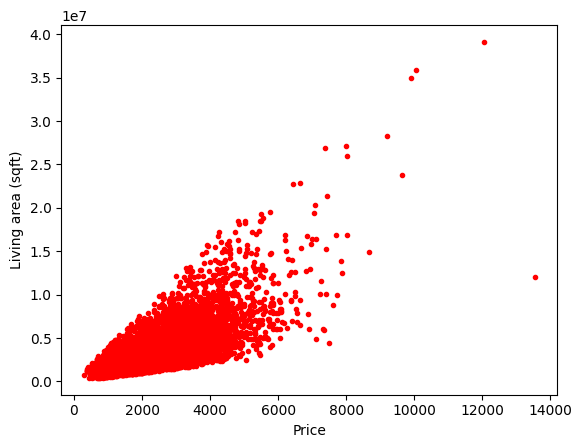

In [85]:
theta = np.linalg.inv(Xmr.T.dot(Xmr)).dot(Xmr.T).dot(living_area)

tf, cost_list = linear_reg(Xr, y, theta, a = 0.0025, n = 50)

print(tf)

xm = np.array([[0], [np.max(price)]])
xmr = np.hstack((np.ones((2, 1)), xm))
ym = np.dot(xmr, tf)

plt.plot(Xr[:,1], y, 'r.')

plt.xlabel('Price')
plt.ylabel('Living area (sqft)')
plt.show()


## Task 4
Determinar el grado del polinomio para describir la nube de puntos usando cross-validation.

In [86]:
def training_test(data, train_size = 0.8):
    np.random.shuffle(data)
    train_size = int(train_size * len(data))
    return data[:train_size], data[train_size:]

def mean_squared_error(X, y, degree):
    X_poly = np.column_stack([X ** i for i in range(1, degree + 1)])
    X_poly = np.insert(X_poly, 0, 1, axis = 1)
    theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    y_pred = np.dot(X_poly, theta)
    mse = np.sum((y - y_pred) ** 2) / len(X)
    return mse

def cross_validation(data, degree, k = 3):
    np.random.shuffle(data)
    mse = 0
    for i in range(k):
        test_i = np.arange(i, len(data), k)
        train_i = np.setdiff1d(np.arange(len(data)), test_i)
        mse += mean_squared_error(data[train_i][:, 0], data[train_i][:, 1], degree)
    mse /= k
    return mse
        
def best_degree(data, max):
    mse_best = float('inf')
    for d in range(1, max):
        mse = cross_validation(data, d)
        if mse < mse_best:
            mse_best = mse
            degree_best = d
    return degree_best
    
data_train, data_test = training_test(np.column_stack((price, living_area)), train_size = 0.8)

best_degree = best_degree(data_train, 50) # Probamos con distintos grados de polinomio para ver cual es el mejor

print("best_degree = ", best_degree)

C:\Users\josem\AppData\Local\Temp\ipykernel_34268\3531089307.py:7: RuntimeWarning: overflow encountered in power
  X_poly = np.column_stack([X ** i for i in range(1, degree + 1)])


best_degree =  10


## Task 5 : Analisis de resultados
Al realizar una regresion lineal para este dataset obtenemos que las variables "precio" y "metros cuadrados de vivienda" tienen correlacion lineal positiva. Esto quiere decir que mientras que la vivienda tenga mas espacio disponible, el precio de la misma tiende a aumentar igualmente.

Se encontro un buen grado del polinomio para este ya que luego de compararlo con los datos de prueba y 50 grados diferentes se encontro que el de grado 10 es el que se ajusta de mejor manera, generando asi un error menor. 